# Phase Classification
## Model comparison

In [8]:
import json
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import *
from tensorflow.keras.layers import *

In [9]:
def evaluate_model(build_model, x_train, y_train, x_test, y_test):
    epoch_convergence = []
    train_loss = []
    train_accuracy = []
    test_loss = []
    test_accuracy = []

    model_history_of_last_run = []

    # build and train model
    for i in range(5):
        model = build_model()

        model_history = model.fit(x_train, y_train,
                                  batch_size=128,
                                  epochs=20,
                                  verbose=0,
                                  validation_data=(x_test, y_test))

        # Report model summary once
        if i == 0:
            model.summary()

        epoch_number_after_train_accuracy_convergence = find_stable_epoch(model_history, 'accuracy')
        epoch_number_after_test_accuracy_convergence = find_stable_epoch(model_history, 'val_accuracy')

        epoch_number_after_model_convergence = max(epoch_number_after_train_accuracy_convergence,
                                                   epoch_number_after_test_accuracy_convergence)

        # evaluate model
        score = model.evaluate(x_test, y_test, verbose=0)

        # Append data
        epoch_convergence.append(epoch_number_after_model_convergence)
        train_loss.append(model_history.history['loss'][-1])
        train_accuracy.append(model_history.history['accuracy'][-1])
        test_loss.append(score[0])
        test_accuracy.append(score[1])

        # Save a sample of the training history
        if i == 4:
            model_history_of_last_run = model_history

    average_epoch_after_convergence = np.average(epoch_convergence)
    average_loss_train = np.average(train_loss)
    average_accuracy_train = np.average(train_accuracy)
    average_loss_test = np.average(test_loss)
    average_accuracy_test = np.average(test_accuracy)

    return ({'Average epoch after convergence': average_epoch_after_convergence,
             'Average training loss': average_loss_train,
             'Average training accuracy': average_accuracy_train,
             'Average test loss': average_loss_test,
             'Average test accuracy': average_accuracy_test}, model_history_of_last_run)


def find_stable_epoch(model_history, identifier):
    identical_accuracy_count = 0
    last_accuracy_value = 0
    stable_epoch_number = 0
    for index, accuracy in enumerate(model_history.history[identifier]):
        if last_accuracy_value == accuracy:
            identical_accuracy_count += 1
        if identical_accuracy_count == 4:
            stable_epoch_number = index + 1
            break
        last_accuracy_value = accuracy

    if stable_epoch_number == 0:
        stable_epoch_number = -1

    return stable_epoch_number


def visualize_training(model_history, model_name):
    # visualize history for accuracy
    plt.plot(model_history.history['accuracy'])
    plt.plot(model_history.history['val_accuracy'])
    plt.ylabel('model accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='best')
    plt.title('Accuracy of {model_name} w.r.t. training epochs'.format(model_name=model_name))
    plt.show()
    # visualize history for loss
    plt.plot(model_history.history['loss'])
    plt.plot(model_history.history['val_loss'])
    plt.ylabel('model loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='best')
    plt.title('Loss of {model_name} w.r.t. training epochs'.format(model_name=model_name))
    plt.show()


def report_and_visualize_model_performance(build_model, x_train, y_train, x_test, y_test, model_name):
    performance_report, model_history_sample = evaluate_model(build_model, x_train, y_train, x_test, y_test)
    visualize_training(model_history_sample, model_name)
    print(json.dumps(performance_report, indent=2))

def magnetization(data):
    configuration = data
    m = np.sum(np.sum(configuration,axis=2),axis=1)
    return m

In [10]:
x_train = np.load("x_train.npy")
x_test = np.load("x_test.npy")
x_train_reduced = np.load("x_train_reduced.npy")
x_test_reduced = np.load("x_test_reduced.npy")
x_new_train = np.load("x_new_train.npy")
x_new_test = np.load("x_new_test.npy")
y_train = np.load("y_train.npy")
y_test = np.load("y_test.npy")

Model: "Dense_network"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_31 (Flatten)         multiple                  0         
_________________________________________________________________
dense_87 (Dense)             multiple                  102464    
_________________________________________________________________
dense_88 (Dense)             multiple                  65        
Total params: 102,529
Trainable params: 102,529
Non-trainable params: 0
_________________________________________________________________
{
  "Average epoch after convergence": 6.4,
  "Average training loss": 3.9727817056700585e-05,
  "Average training accuracy": 1.0,
  "Average test loss": 0.0002621884690597653,
  "Average test accuracy": 1.0
}


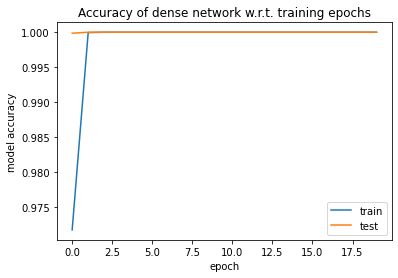

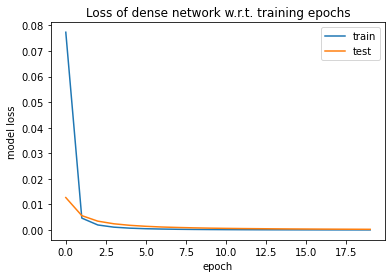

In [11]:
# dense model for complete spin configurations

def build_dense_model():
    model = Sequential(name='Dense_network')
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])

    return model

report_and_visualize_model_performance(build_dense_model, x_train, y_train, x_test, y_test, 'dense network')

Model: "Dense_network_reduced_input"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_97 (Dense)             multiple                  1344      
_________________________________________________________________
dense_98 (Dense)             multiple                  65        
Total params: 1,409
Trainable params: 1,409
Non-trainable params: 0
_________________________________________________________________
{
  "Average epoch after convergence": 18.2,
  "Average training loss": 0.004627539310604334,
  "Average training accuracy": 0.9997335910797119,
  "Average test loss": 0.005842568632215261,
  "Average test accuracy": 0.9995866537094116
}


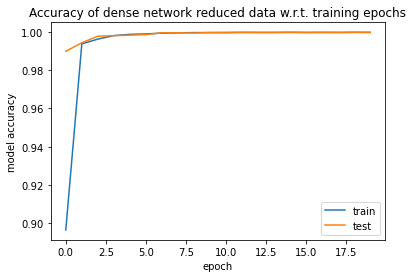

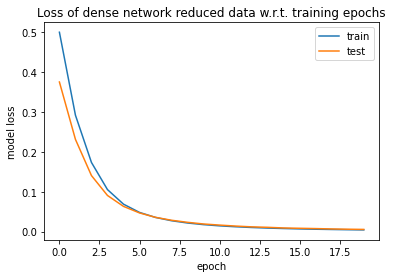

In [12]:
# dense model for reduced data

def build_model_for_reduced_data():
    model= Sequential(name='Dense_network_reduced_input')
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])

    return model

report_and_visualize_model_performance(build_model_for_reduced_data, x_train_reduced, y_train, x_test_reduced, y_test, 'dense network reduced data')

Model: "ConvolutionalNetwork"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 38, 38, 5)         50        
_________________________________________________________________
activation_15 (Activation)   (None, 38, 38, 5)         0         
_________________________________________________________________
flatten_36 (Flatten)         (None, 7220)              0         
_________________________________________________________________
dense_107 (Dense)            (None, 1)                 7221      
Total params: 7,271
Trainable params: 7,271
Non-trainable params: 0
_________________________________________________________________
{
  "Average epoch after convergence": 6.2,
  "Average training loss": 2.0556619165290613e-05,
  "Average training accuracy": 1.0,
  "Average test loss": 2.9962209191580767e-05,
  "Average test accuracy": 1.0
}


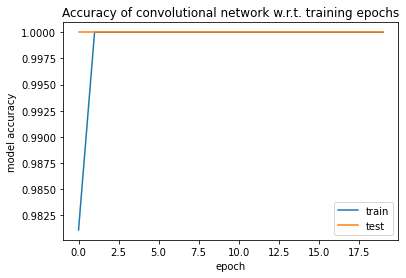

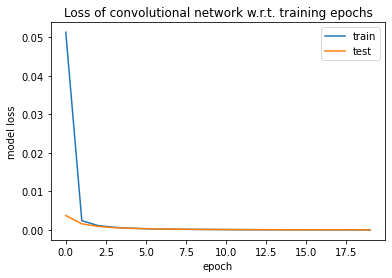

In [13]:
# convolutional model for complete spin configuration

x_train_reshaped = x_train[:,:,:, np.newaxis]
x_test_reshaped = x_test[:,:,:, np.newaxis]
input_shape = (40,40,1)

def build_conv_model():
    model = Sequential(name='ConvolutionalNetwork')
    model.add(Conv2D(5, (3,3), input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

    return model

report_and_visualize_model_performance(build_conv_model, x_train_reshaped, y_train, x_test_reshaped, y_test, 'convolutional network')

Model: "Dense_network_with_feature_input"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_122 (Dense)            multiple                  4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________
{
  "Average epoch after convergence": 7.0,
  "Average training loss": 0.07613682597875596,
  "Average training accuracy": 1.0,
  "Average test loss": 0.07312210798263549,
  "Average test accuracy": 1.0
}


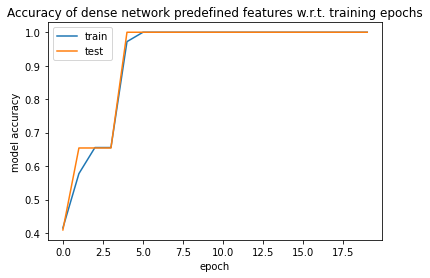

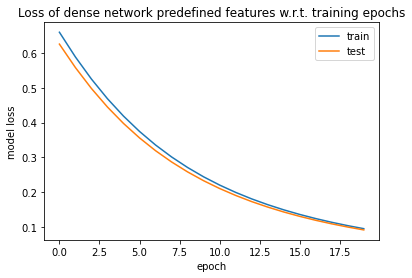

In [16]:
# model with pre-defined features

# Fifth attempt without using a hidden layer
def build_model_with_predefined_features():
    model = Sequential(name='Dense_network_with_feature_input')
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])

    return model

report_and_visualize_model_performance(build_model_with_predefined_features, x_new_train, y_train, x_new_test, y_test, 'dense network predefined features')
